In [22]:
# Import everything that you use here. The only packages allowed are from bm-336546
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE
from manual_log_reg import ManualLogisticRegression

# Part I: Loss minimization with gradient descent
Let L(w1, w2) be a loss function defined as follows:
L(w1, w2) = −10(0.4cos(w1) − w
2
1 − 0.2w
7
2 + sin(w2))e
(−w
2
1−w
2
2
)
Assume the features and the labels (x and y) are embedded within the coefficients so you may ignore
them. Notice that this loss function can have negative values. The error surface created by the loss is
shown below.


In [25]:
def loss_func(w, lmbda=0):
      w1, w2 = w[0], w[1]
      loss = -10 * ((0.4*np.cos(w1) - w1**2 - 0.2 * w2**7 + np.sin(w2)) * np.exp(- w1**2 - w2**2)) + lmbda*(w1**2+ w2**2)
      return loss

def grad_cal(w, lmbda=0):
    w1, w2 = w[0], w[1]
    grad_x = -10*((-0.4*np.sin(w1)-2*w1)*np.exp(-w1**2-w2**2)+(0.4*np.cos(w1)-w1**2-0.2*w2**7+np.sin(w2))*-2*w1*np.exp(-w1**2-w2**2)) + 2*lmbda*w1

    grad_y = -10*((-1.4*w2**6+np.cos(w2))*np.exp((-w1**2-w2**2))+(0.4*np.cos(w1) - w1**2-0.2 * w2**7+np.sin(w2))*np.exp(-w1**2-w2**2)*(-2*w2)) + 2*lmbda*w2
    return np.array((grad_x,grad_y))

def grad_desc (w, n, lmbda=0):
       th = 10 ** (-4)
       loss = [loss_func(w, lmbda)]
       for idx in range(300):
          grad = grad_cal(w, lmbda)
          w_new = [w[0] - (n*grad[0]), w[1] - (n*grad[1])]
          diff1, diff2 = w_new[0] - w[0], w_new[1] - w[1]
          if np.linalg.norm([diff1, diff2]) < th:
            break
          else:
               w = w_new
               loss_new = loss_func(w, lmbda)
               loss.append(loss_new)

       print('Optimal w is: %s' % w)
       print('Final value of loss: %s' % loss[-1])
       plt.plot(loss)
       plt.xlabel('Iterations')
       plt.ylabel('Loss')
       plt.title('The loss as a function of iterations')
       plt.show()

### Question 2
2. In the following subsections you should apply gradient descent update of the weights according
to the instructions. Implement a function called grad desc that has three positional arguments
(w01, w02, η) which are the initial weights and the learning rate. The algorithm should stop either
when the number of iterations is over 300 or when ||−→w n+1−
−→w n||2 < 10−4
. Implement the algorithm
so it will stop at whatever condition it reaches first. The function should also plot the loss as
a function of iterations, print the ”optimal” −→w that you got and the final value of the loss at the
optimal weight. Run your function with the following:

• Initialize [w1, w2] to [1, 1] and set η to 0.001.

• Initialize [w1, w2] to [0, −2.2] and set η to 0.001.

• Initialize [w1, w2] to [1, 1] and set η to 0.1.

• Initialize [w1, w2] to [2, 2] and set η to 0.001.

Run #1 
initial weights = [1, 1] and learning rate = 0.001
Optimal w is: [0.0016342110360976886, 0.4965758564897642]
Final value of loss: -6.837199622836203


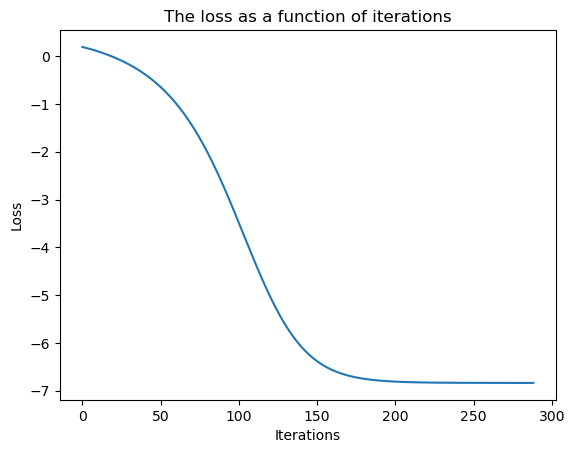

Run #2 
initial weights = [0, -2.2] and learning rate = 0.001
Optimal w is: [0.0, -1.9088677468056634]
Final value of loss: -4.688349487754756


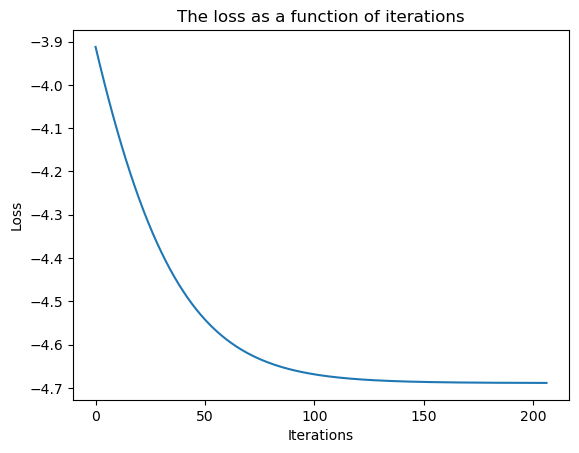

Run #3 
initial weights = [1, 1] and learning rate = 0.1
Optimal w is: [0.49146026667276954, 0.47730772088159834]
Final value of loss: -3.5609643259232966


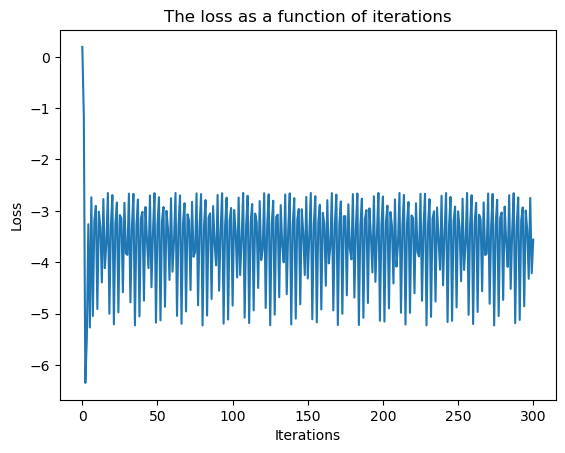

Run #4 
initial weights = [2, 2] and learning rate = 0.001
Optimal w is: [2.093983220084856, 2.0221014383514975]
Final value of loss: 0.06545202166601019


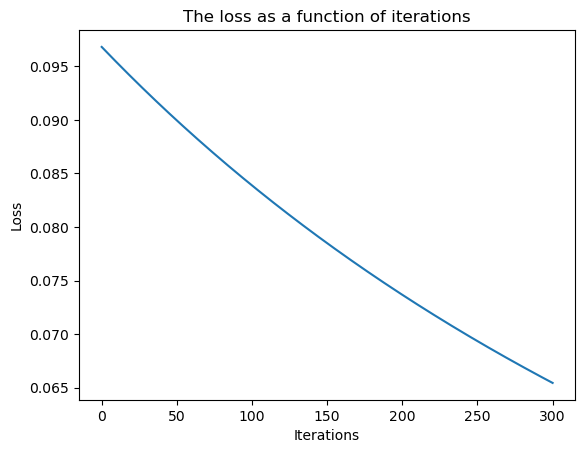

In [26]:
w_init = [[1,1], [0,-2.2], [1,1], [2,2]]
lrn_rate = [0.001, 0.001, 0.1, 0.001]
for i in range(4):
     print('Run #%s' %(i+1), '\ninitial weights = %s' %w_init[i], 'and learning rate = %s' %lrn_rate[i])
     grad_desc(w_init[i],lrn_rate[i])

### Question 5
Modify your function by using a keyword argument named lmbda (not lambda) that has the default
value of 0. Initialize again [w1, w2] to [1, 1] and η to 0.001. Run your function with λ = 0.01 and
λ = 100. Compare the results with the results for the same initialized weights in section (2). Did
you expect to have these final weights when using regularization?


Run #1 \ninitial weights = [1, 1]  learning rate = 0.001  lmbda = 0.01
Optimal w is: [0.0016008907302295721, 0.4961418476812824]
Final value of loss: -6.83477364425813


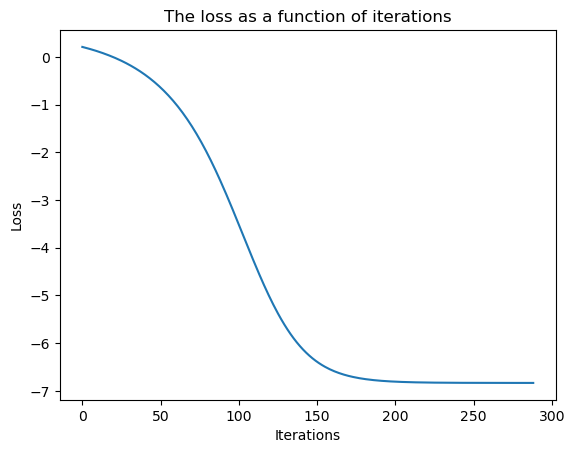

Run #2 \ninitial weights = [1, 1]  learning rate = 0.001  lmbda = 100
Optimal w is: [0.00017767229219818397, 0.04804870357863002]
Final value of loss: -4.239099063088176


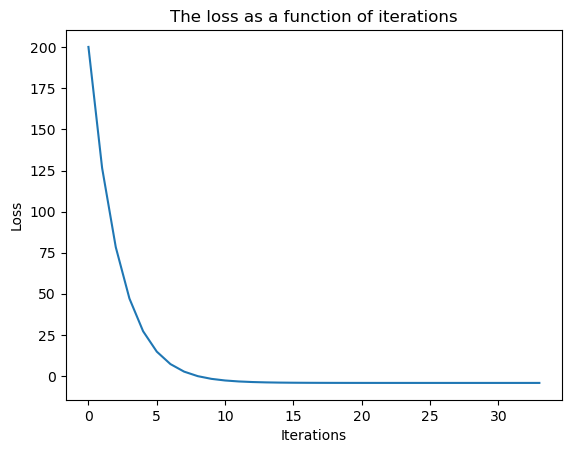

In [7]:
lmbda = [0.01, 100]
for i in range(2):
    print('Run #%s' %(i+1), '\\ninitial weights = %s' %w_init[0], ' learning rate = %s' %lrn_rate[0], ' lmbda = %s' %lmbda[i])
    grad_desc(w_init[0],lrn_rate[0],lmbda[i])

# Part II: Linear vs. nonliner classifiers

In this part we provide you with a dataset (”X data.csv”, ”y data.csv”) You are required to implement
and present your results in Part1 and 2 2.ipynb in the adequate part. Mark the begining of the cells with
the adequate section. In this assignment, you will do the following:

• Explore the data provided.

• Train linear and non-linear classifiers.

• Optimize a model with k-fold cross validation.

• Evaluate your model performance with appropriate metrics.

• Present a 2D visualization of multi-featured data.

• Use feature selection tools.

You may only use your bm-336546 environment. Packages outside of it are not allowed!


#### Instructions

1. Preprocess the data and explain the steps.
2. Perform a test-train split of 20% test.
3. Provide detailed visualization and exploration of the data. You should at least include:
    
    (a) An analysis to show that the distribution of the features is similar between test and train.
        
        i. What issues could an imbalance of features distribution between train and test cause?
        ii. Search in the scientific literature and suggest and explain at least one possible solution.

    (b) Plots to show the relationship between feature and label and additional plots that help to
    explore the data (similar to the ones done in the tutorials).
    
    (c) State any insights you have:
    
        i. Was there anything unexpected?
        ii. Are there any features that you feel will be particularly important to your model? Explain why. Base your answer on a valid reference.

4. Choose, build and optimize Machine Learning Models:
    
    (a) Use 5k cross fold validation and tune the hyperparameters to get the highest AUROC (aka AUC). For doing so, apply GridSearchCV and PipeLine. Set random state of all classifiers to 336546. The hyperparmeter grid should not have more than 5 values for every hyperparmeter.
    The hyperparameters to tune are:
        
        • [C, penalty] for logistic regression. Set the solver to be ’saga’.
        • [C, kernel] for SVM. Set probability=True so you can have AUC.
        • [criterion, max depth, max features] for Random Forest.
    
    (b) Train all of the models with the chosen hyperparmeters on the full training set. You may skip this and move on to (c) by using correctly GridSearchCV from the previous section.
    
    (c) Report the evaluation metrics of AUC, F1, ACC on the testset for the three models.
    
    (d) Which performed the best on the testset? Linear or nonlinear models? Compare all of them to a naive classifier. *Notice that the difference in performance between the models can be
    subtle.

5. Feature Selection:

    (a) As seen previously, a Random Forest classifier can be used to explore feature importance. Train a Random Forest on your data.
    
        i. Report AUC, F1, ACC for both train and test set for the Random Forest model.
        
        ii. Is there a performance difference between train and test? Why? If there is a difference, what can you do to reduce it?
        
        iii. What is the advantage of Random Forest model compared to SVM model?
        
        iv. What are the 2 most important features according to the random forest? What are the two most important according to logistic regression? Does this match up with the feature exploration you did?

In [8]:
X = pd.read_csv('X_data.csv')
X.drop(columns=X.columns[0], axis=1, inplace=True)
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [9]:
y = pd.read_csv('y_data.csv')  # read and convert to numpy
y.drop(columns=y.columns[0], axis=1, inplace=True)
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


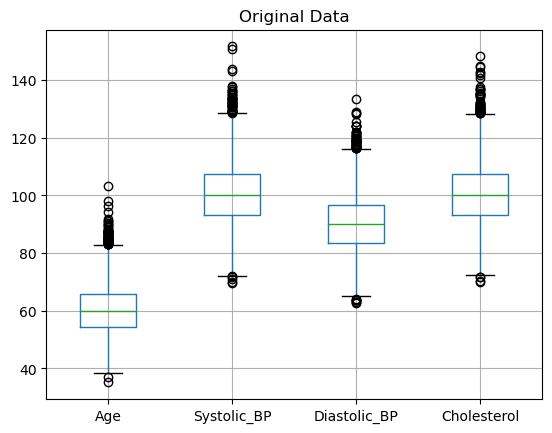

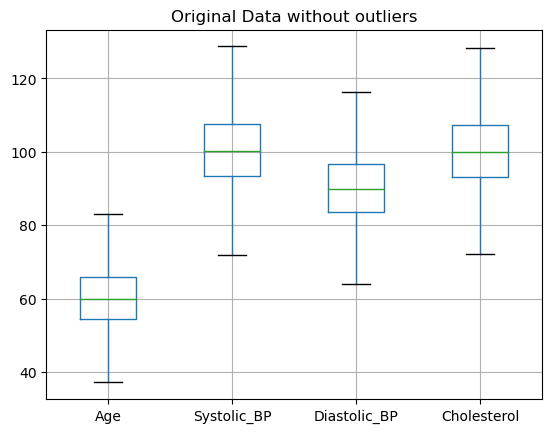

In [10]:
# Preprocessing section

# Working with copied files of the dataset
Original_DataX = X.copy()
Original_DataY = y.copy()

# Making sure that all values in the dataset are numeric values.
Original_DataX = Original_DataX.apply(lambda col: pd.to_numeric(col, errors='coerce'))
Original_DataY = Original_DataY.apply(lambda col: pd.to_numeric(col, errors='coerce'))

# Checking for outliers in the dataset using boxplot
Original_DataX.boxplot()
plt.title('Original Data')
plt.show()
#Note: We can see in the boxplot that there are number of outliers in each feature. Therefor, we will proceed with cleaning the outliers.

for col in Original_DataX.columns:

    Q1 = Original_DataX[col].quantile(0.25)
    Q3 = Original_DataX[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5*IQR)
    upper_whisker = Q3 + (1.5*IQR)
    Original_DataX[col] = np.where(Original_DataX[col]>upper_whisker,upper_whisker,np.where(Original_DataX[col]<lower_whisker,lower_whisker,Original_DataX[col]))

Original_DataX.boxplot()
plt.title('Original Data without outliers')
plt.show()
#Note: We can see that there are no more outliers, and they were replaced with other values using the capping method.

# Rounding the Age variable
Original_DataX['Age']=Original_DataX['Age'].round()


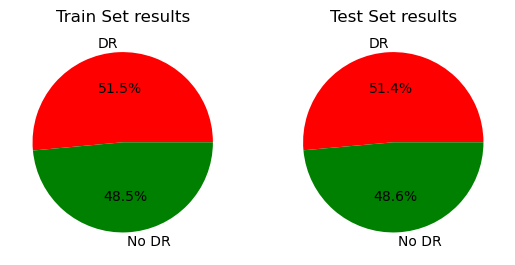

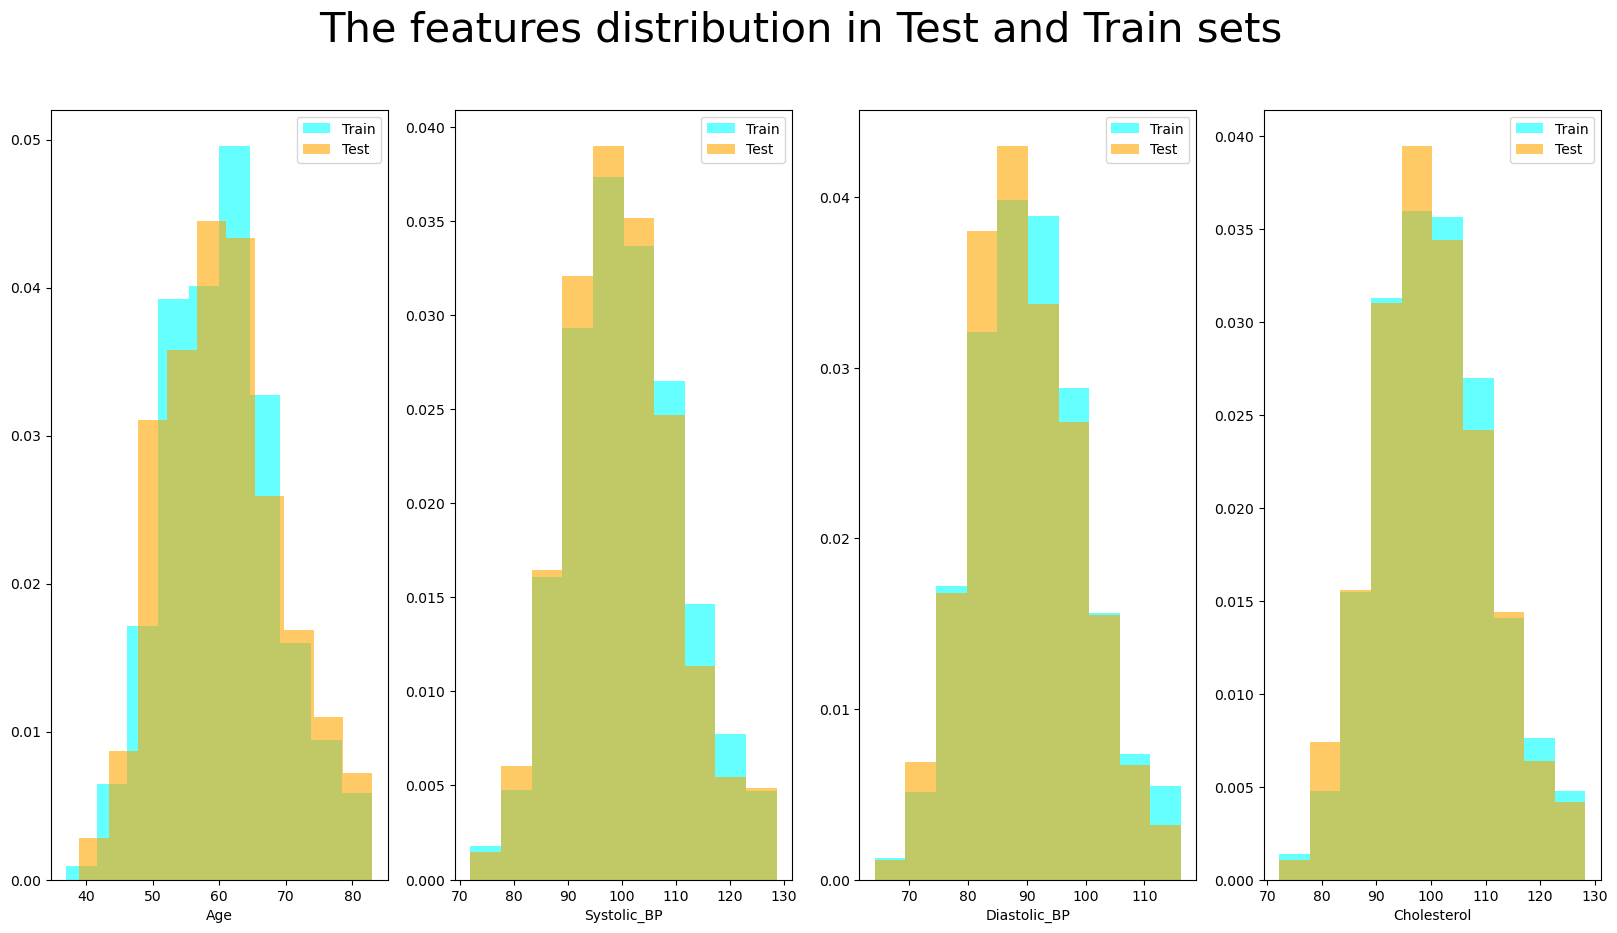

In [11]:
# Splitting to train and test sets

X_train, X_test, y_train, y_test = train_test_split(Original_DataX, Original_DataY, test_size=0.2, random_state= 336546, stratify=Original_DataY)

# Using the pie chart to visualize the % of the label across the test and train set.

fig, axs = plt.subplots(1,2)
y_train.value_counts().plot(kind= "pie", labels = ['DR', 'No DR'], colors= ['red', 'green'], autopct='%1.1f%%', title= 'Train Set results',ax=axs[0])
y_test.value_counts().plot(kind= "pie", labels = ['DR', 'No DR'], colors= ['red', 'green'], autopct='%1.1f%%', title= 'Test Set results', ax=axs[1])
plt.show()

# Distribution of features in both the test and train sets

features = ['Age', 'Systolic_BP', 'Diastolic_BP','Cholesterol']

fig,axs = plt.subplots(1,4, figsize=(20,10))
ax = axs.flatten()
fig.suptitle('The features distribution in Test and Train sets', fontsize=30)
for idx in range(len(ax)):
    ax[idx].hist(X_train.loc[:,features[idx]],color='cyan',alpha=0.6,label='Train',density=True)
    ax[idx].hist(X_test.loc[:,features[idx]],color='orange',alpha=0.6,label='Test',density=True)
    ax[idx].set_xlabel(features[idx])
    ax[idx].legend(loc='upper right')
plt.show()


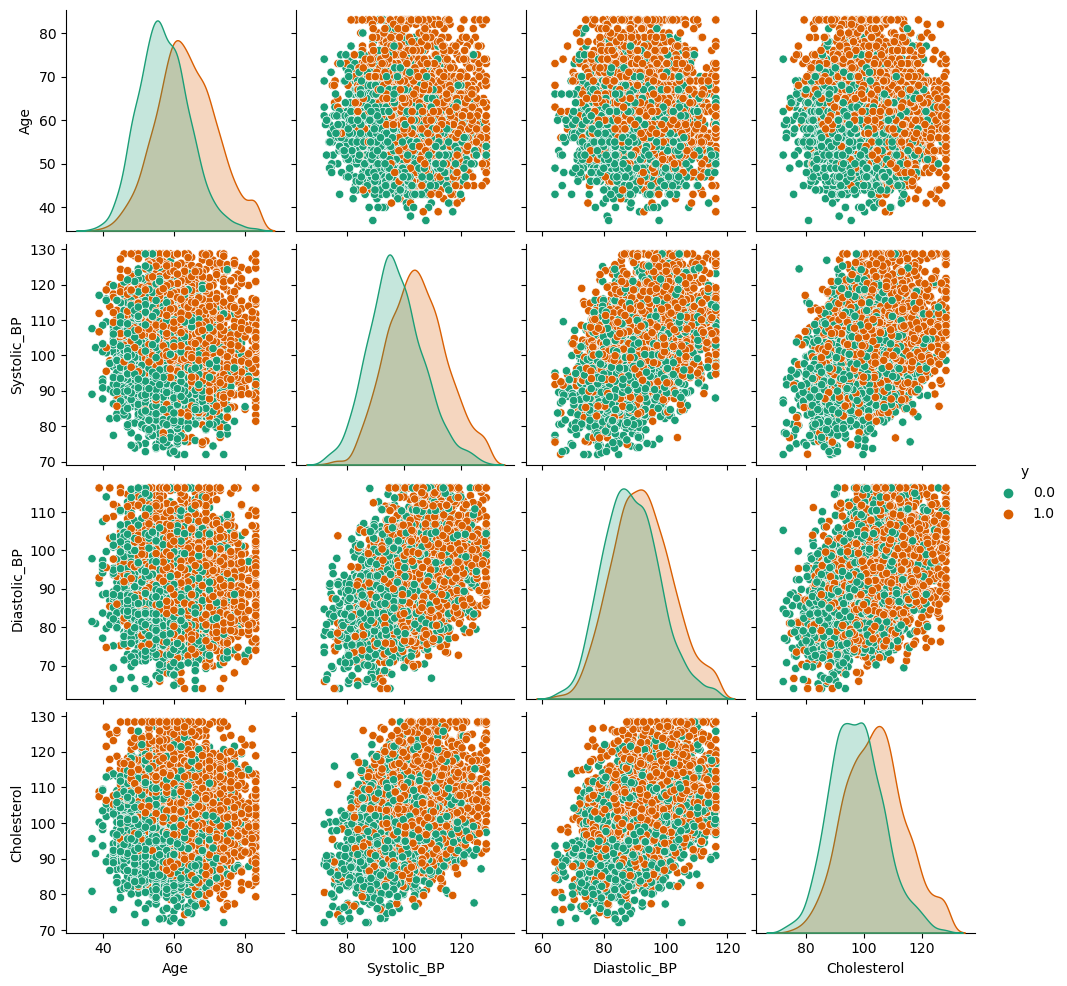

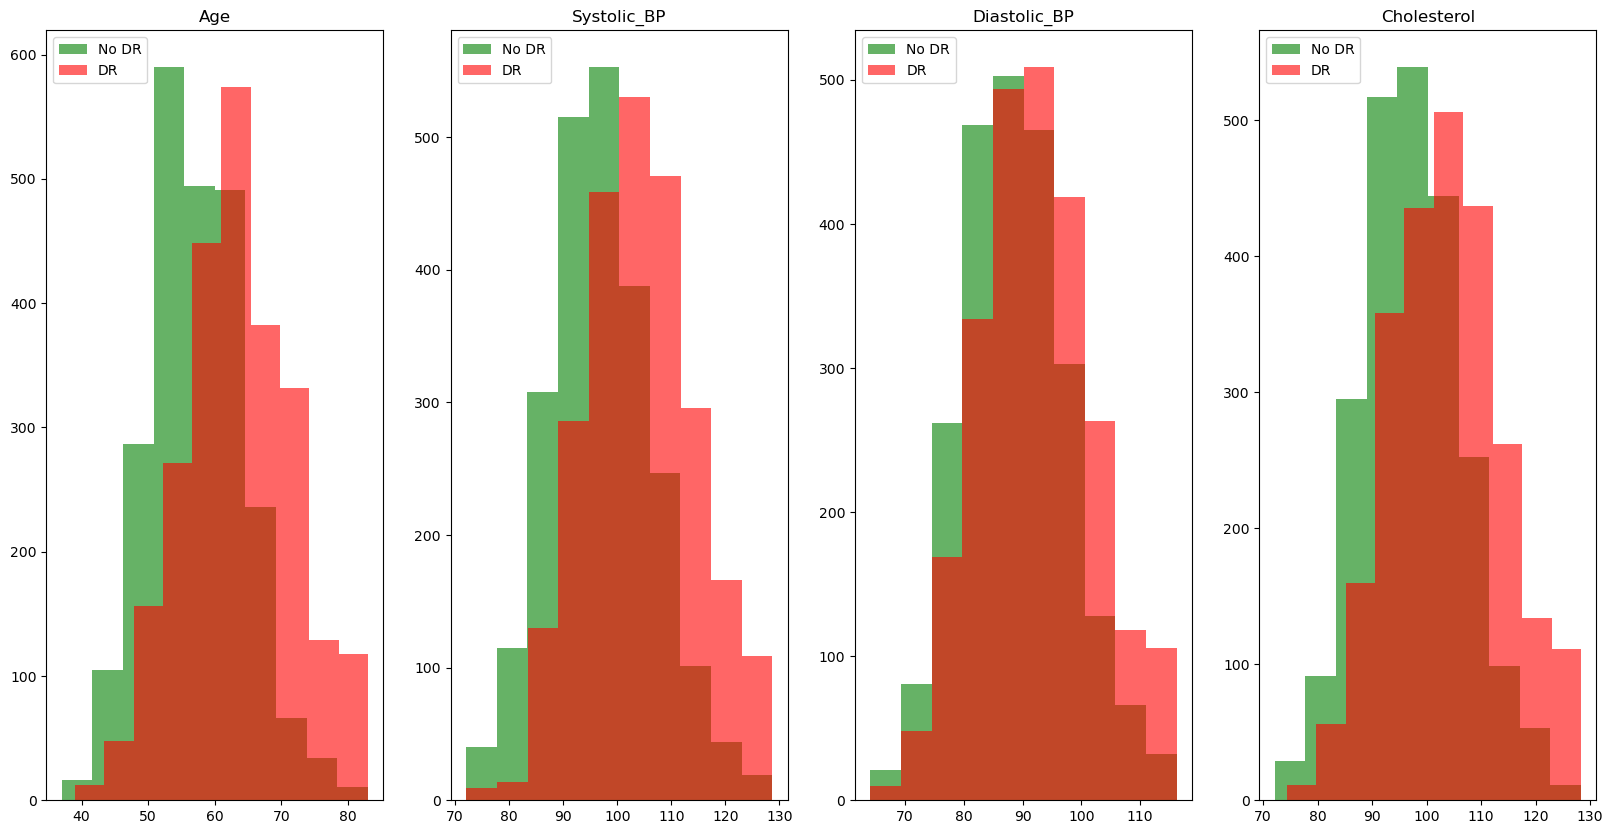

In [12]:
# Visualization

# The relation between the different features and their labels
DataCombined_train = pd.concat([X_train,y_train],axis = 1)
features = ['Age','Systolic_BP','Diastolic_BP','Cholesterol']
Data_groups = DataCombined_train.groupby(DataCombined_train.y)
Data_0group = Data_groups.get_group(0)
Data_1group = Data_groups.get_group(1)

# distribution of single feature and relationship between the features.
sns.pairplot(DataCombined_train,hue='y',palette='Dark2')


fig,axs = plt.subplots(1,4, figsize=(20,10))
ax = axs.ravel()
for idx in range(len(ax)):
    ax[idx].hist(Data_0group.loc[:,features[idx]],alpha=0.6,label='No DR',color='green')
    ax[idx].hist(Data_1group.loc[:,features[idx]],alpha=0.6, label='DR',color='red')
    ax[idx].set_title(features[idx])
    ax[idx].legend(loc='upper left')
plt.show()

In [13]:
# K-fold Validation

# Note: we will use Stratified K-Fold Cross-Validation because it allows for each fold to have an equal ratio of all classes of the data.
skf = StratifiedKFold(n_splits=5, random_state=336546, shuffle=True)

#Logestic regression
LR_model = LogisticRegression(random_state=336546, solver='saga')
C1 = np.array([0.01,0.015,0.02,0.04,0.1])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', LR_model)])
paramGrid = {'logistic__penalty': ['l1','l2'],'logistic__C': C1} # C1 or 1/C1 ?
clr= GridSearchCV(estimator=pipe, param_grid = paramGrid , cv = skf, n_jobs=-1,scoring=['accuracy','f1','roc_auc'],
refit='roc_auc')
clr.fit(X_train,y_train)
print(" Results from Grid Search for Logistic Regression are: ")
print(" \n The best estimator is: \n", clr.best_estimator_)
print(" \n The best score is: \n", clr.best_score_)
print(" \n The best parameters are: \n", clr.best_params_)

Y_Prediction_LR=clr.predict(X_test)
Y_Prob_LR= clr.predict_proba(X_test)
F1_LR = f1_score(y_test, Y_Prediction_LR)
ACC_LR = accuracy_score(y_test,Y_Prediction_LR)
AUC_LR = roc_auc_score(y_test,Y_Prob_LR[:,1])
print("\n F1 of logistic regression:  ",F1_LR)
print("\n ACC of logistic regression:  ",ACC_LR)
print("\n AUC of logistic regression:  ",AUC_LR)

 Results from Grid Search for Logistic Regression are: 
 
 The best estimator is: 
 Pipeline(steps=[('scale', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.02, penalty='l1', random_state=336546,
                                    solver='saga'))])
 
 The best score is: 
 0.821863216972772
 
 The best parameters are: 
 {'logistic__C': 0.02, 'logistic__penalty': 'l1'}

 F1 of logistic regression:   0.7459915611814345

 ACC of logistic regression:   0.7491666666666666

 AUC of logistic regression:   0.8245202398592204


C:\Users\appelm3\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#SVM
svm_model = SVC(probability = True, random_state =336546 )
C2 = np.array([0.004,0.01,0.035,0.5,1])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svm_model)])
paramGrid = {'svm__kernel': ['linear','poly','rbf','sigmoid'],'svm__C': C2}
csvm= GridSearchCV(estimator=pipe, param_grid = paramGrid , cv = skf, n_jobs=-1,scoring=['accuracy','f1','roc_auc'],
refit='roc_auc')
csvm.fit(X_train,y_train)

print(" Results from Grid Search for the SVM are: ")
print(" \n The best estimator is: \n", csvm.best_estimator_)
print(" \n The best score is: \n", csvm.best_score_)
print(" \n The best parameters are: \n", csvm.best_params_)

Y_Prediction_svm=csvm.predict(X_test)
Y_Prob_svm= csvm.predict_proba(X_test)

F1_svm = f1_score(y_test, Y_Prediction_svm)
ACC_svm = accuracy_score(y_test,Y_Prediction_svm)
AUC_svm = roc_auc_score(y_test,Y_Prob_svm[:,1])
print("\n F1 of SVM:  ",F1_svm)
print("\n ACC of SVM:  ",ACC_svm)
print("\n AUC of SVM:  ",AUC_svm)

C:\Users\appelm3\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Results from Grid Search for the SVM are: 
 
 The best estimator is: 
 Pipeline(steps=[('scale', StandardScaler()),
                ('svm',
                 SVC(C=0.01, kernel='linear', probability=True,
                     random_state=336546))])
 
 The best score is: 
 0.8217815502771455
 
 The best parameters are: 
 {'svm__C': 0.01, 'svm__kernel': 'linear'}

 F1 of SVM:   0.7476793248945147

 ACC of SVM:   0.7508333333333334

 AUC of SVM:   0.8245341399067584


In [15]:
# Random Forest
RF_model = RandomForestClassifier( random_state =336546)
pipe = Pipeline(steps=[('RF', RF_model)])
paramGrid = {'RF__criterion': ['gini', 'entropy', 'log_loss'],'RF__max_depth':[3,5,7,9,11] , 'RF__max_features':['auto', 'sqrt', 'log2','None']}
crf= GridSearchCV(estimator=pipe, param_grid = paramGrid , cv = skf, n_jobs=-1,scoring=['accuracy','f1','roc_auc'],
refit='roc_auc')
crf.fit(X_train,y_train)
print(" Results from Grid Search for the Random Forest are: ")
print(" \n The best estimator is: \n", crf.best_estimator_)
print(" \n The best score is: \n", crf.best_score_)
print(" \n The best parameters are: \n", crf.best_params_)


Y_Prediction_RF=crf.predict(X_test)
Y_Prob_RF= crf.predict_proba(X_test)
F1_RF = f1_score(y_test, Y_Prediction_RF)
ACC_RF = accuracy_score(y_test,Y_Prediction_RF)
AUC_RF = roc_auc_score(y_test,Y_Prob_RF[:,1])
print("\n F1 of Random Forest:  ",F1_RF)
print("\n ACC of Random Forest:  ",ACC_RF)
print("\n AUC of Random Forest:  ",AUC_RF)

C:\Users\appelm3\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\appelm3\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\appelm3\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\appelm3\AppData\Local\anaconda3\Lib\site-packages\sk

 Results from Grid Search for the Random Forest are: 
 
 The best estimator is: 
 Pipeline(steps=[('RF',
                 RandomForestClassifier(max_depth=5, random_state=336546))])
 
 The best score is: 
 0.823095602161561
 
 The best parameters are: 
 {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__max_features': 'sqrt'}

 F1 of Random Forest:   0.7544715447154471

 ACC of Random Forest:   0.7483333333333333

 AUC of Random Forest:   0.8236584369118543


In [15]:
#Comparison between the models

# Naive Classifier for comparison
cdummy = DummyClassifier(strategy='uniform')
cdummy.fit(X_train,y_train)
cdummy.predict(X_test)
Y_Prediction_cdummy=cdummy.predict(X_test)
Y_Prob_cdummy= cdummy.predict_proba(X_test)
F1_cdummy = f1_score(y_test, Y_Prediction_cdummy)
ACC_cdummy = accuracy_score(y_test,Y_Prediction_cdummy)
AUC_cdummy = roc_auc_score(y_test,Y_Prob_cdummy[:,1])


data = pd.DataFrame({'model':['Logistic Regression','SVM','Random Forest','Naive clssifier'],'F1': [F1_LR, F1_svm,F1_RF,F1_cdummy],'ACC':[ACC_LR,ACC_svm,ACC_RF,ACC_cdummy], 'AUC':[AUC_LR,AUC_svm,AUC_RF,AUC_cdummy]})
data.columns = ['Classifier type','F1','ACC','AUC']
print(data)

       Classifier type        F1       ACC       AUC
0  Logistic Regression  0.745992  0.749167  0.824520
1                  SVM  0.747679  0.750833  0.824534
2        Random Forest  0.754472  0.748333  0.823658
3      Naive clssifier  0.530351  0.510000  0.500000


C:\Users\yara\AppData\Local\Temp\ipykernel_10312\104751005.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  c_rf.fit(X_train,y_train)
C:\Users\yara\miniconda3\envs\bm-336546\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


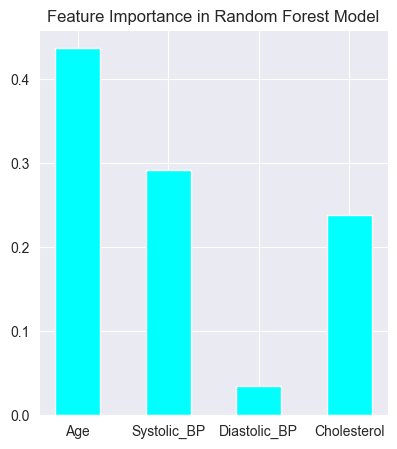


 F1 of Random Forest for the training set:   0.7759842519685041

 ACC of Random Forest for the training set:   0.7629166666666667

 AUC of Random Forest for the training set:   0.8496550885301735

 F1 of Random Forest for the test set:   0.7544715447154471

 ACC of Random Forest for the test set:   0.7483333333333333

 AUC of Random Forest for the test set:   0.8236584369118543
-----------------------------------------------------------
  Set type        F1       ACC       AUC
0    Train  0.775984  0.762917  0.849655
1     Test  0.754472  0.748333  0.823658


C:\Users\yara\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yara\miniconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yara\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yara\miniconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yara\miniconda3\envs\bm-336546\lib\site-pac

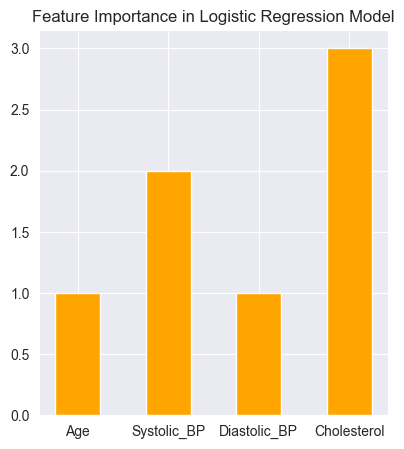

In [16]:
# Feature selection

# We took the hyperparmeters we got from the previous section and implemented them in the classifiers here

# Random Forest

c_rf= RandomForestClassifier(max_depth=5, max_features='auto', criterion='gini', random_state=336546)
c_rf.fit(X_train,y_train)
importances_rf = c_rf.feature_importances_
plt.figure(figsize=(4.5,5))
plt.bar(features, importances_rf, width=0.5, color='cyan')
plt.title('Feature Importance in Random Forest Model')
plt.show()


Y_PredictionTrain_crf = c_rf.predict(X_train)
Y_ProbTrain_crf= c_rf.predict_proba(X_train)
F1_Train_crf = f1_score(y_train, Y_PredictionTrain_crf)
ACC_Train_crf= accuracy_score(y_train,Y_PredictionTrain_crf)
AUC_Train_crf = roc_auc_score(y_train,Y_ProbTrain_crf[:,1])
print("\n F1 of Random Forest for the training set:  ",F1_Train_crf)
print("\n ACC of Random Forest for the training set:  ",ACC_Train_crf)
print("\n AUC of Random Forest for the training set:  ",AUC_Train_crf)


Y_Prediction_crf = c_rf.predict(X_test)
Y_Prob_crf= c_rf.predict_proba(X_test)
F1_crf = f1_score(y_test, Y_Prediction_crf)
ACC_crf= accuracy_score(y_test,Y_Prediction_crf)
AUC_crf = roc_auc_score(y_test,Y_Prob_crf[:,1])
print("\n F1 of Random Forest for the test set:  ",F1_crf)
print("\n ACC of Random Forest for the test set:  ",ACC_crf)
print("\n AUC of Random Forest for the test set:  ",AUC_crf)

RandomForestData = pd.DataFrame({'Set':['Train','Test'],'F1': [F1_Train_crf,F1_crf],'ACC':[ACC_Train_crf,ACC_crf], 'AUC':[AUC_Train_crf,AUC_crf]})
RandomForestData.columns = ['Set type','F1','ACC','AUC']
print('-----------------------------------------------------------')
print( RandomForestData)

# Logistic regression - feature selection

c_lg =LogisticRegression(C=0.02, random_state=336546,solver='saga',penalty='l1')
rfe = RFE(c_lg, n_features_to_select = 2)
rfe=rfe.fit(X_train,y_train)
importance_rfe = rfe.ranking_
plt.figure(figsize=(4.5,5))
plt.bar(features, importance_rfe, width=0.5, color='orange')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

# Part III: Logistic regression from scratch
In this section, you will implement a class which is a basic form of sklearn LogisticRegression and apply
its methods on the same data as before. You should use this class to run Part2 3.ipynb provided to you.
Implement your code wherever it is asked to in the manual log reg.py file. 

• In the log loss implementation you should add ϵ to the probabilities p and 1 − p for stability. Set
ϵ = 1e − 5. The function should return the mean cross-entropy loss according to the inputs.

• In fit implementation you should use the closed form of the gradient of binary cross-entropy shown
in both lecture and tutorial. Do not build any numerical derrivation function.

• predict proba should return a single probability for every example and not a two element vector as in sklearn.

• Don’t forget to implement the sigmoid function which is out of the class.

• In the conf matrix function, the top left matrix calculation was already given to you. By understanding its action, you can relatively easily implement the remaining three values of the confusion
matrix. You do not have to use it if you don’t want to but do not delete this code line. The
confusion matrix rows are interpreted as: ”True label is 0”, ”True labels is 1”. The columns are
interpreted as: ”Predicted label is 0”, ”Predicted label is 1”.

• In order to call a method (a function in the class) from another method you will need to use ”self”.
Look at the implemented method of ”score” for example to see how we call the ”predict” method.

• All of the methods can be implemented with 1-3 short line code. Efficiency won’t be marked but

please make sure you understand exactly what you are asked to implement.

In [17]:
X = pd.read_csv('X_data.csv')
X.drop(columns=X.columns[0], axis=1, inplace=True)

# Minor Preprocessing
X = X.apply(lambda col: pd.to_numeric(col, errors='coerce'))
for col in X.columns:

    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5*IQR)
    upper_whisker = Q3 + (1.5*IQR)
    X[col] = np.where(X[col]>upper_whisker,upper_whisker,np.where(X[col]<lower_whisker,lower_whisker,X[col]))

X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [18]:
y = pd.read_csv('y_data.csv')  # read and convert to numpy
y.drop(columns=y.columns[0], axis=1, inplace=True)
y = y.apply(lambda col: pd.to_numeric(col, errors='coerce')) # PreProcessing
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [19]:
X = X.values  # convert to numpy
y = y.values.astype(int).flatten()  # convert to numpy integers and flatten
#X = np.concatenate((np.ones((len(y), 1)), X), axis=1) # add bias term

"""
 Important Note: The line of 'add bias term' was made as a comment and moved further into the code, because if we scaled the X after the bias was added we would end up with bias=0,
 therefore we added it after the scaling. Furthermore, we cannot scale before we split the data into training and test set because we would risk leakage, thus we first split the
 data->scaled->added the bias term to the x values of test and train sets.
"""

"\n Important Note: The line of 'add bias term' was made as a comment and moved further into the code, because if we scaled the X after the bias was added we would end up with bias=0,\n therefore we added it after the scaling. Furthermore, we cannot scale before we split the data into training and test set because we would risk leakage, thus we first split the\n data->scaled->added the bias term to the x values of test and train sets.\n"

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=336546)

Implement the functions in manual_log_reg.py and train *log_reg* below. Use the *plot* flag in order to show reasonable learning (decrease of the training loss as a function of the iterations). Don't forget to make minor preprocessing so that gradient descent will be stable.

In [23]:
log_reg = ManualLogisticRegression()

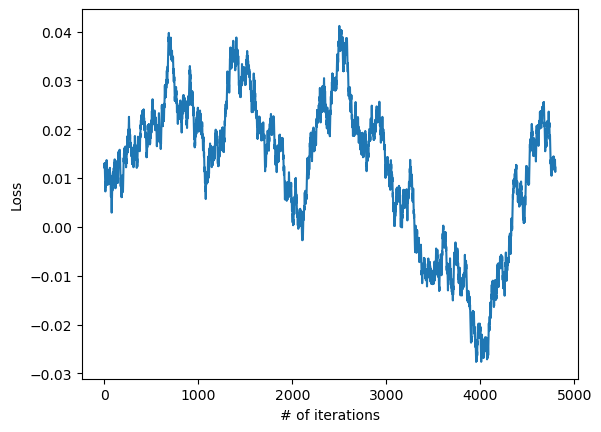

In [27]:
# ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
scaler = StandardScaler()
XTrain = scaler.fit_transform(X_train)
XTest = scaler.fit_transform(X_test)

XTrain = np.concatenate((np.ones((len(y_train), 1)), XTrain), axis=1)
XTest = np.concatenate((np.ones((len(y_test), 1)), XTest), axis=1)

log_reg.fit(XTrain,y_train,plot=True)
# --------------------------------------------------------------------------------------

Sort the learned weights (excluding the bias term). Which of the features is the most important one?

In [28]:
# ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
learned_w = log_reg.w.copy()
learned_w = np.delete(learned_w,0)
learned_w = pd.DataFrame({'Features': ['Age', 'Systolic_BP', 'Diastolic_BP','Cholesterol'], 'Weights':[learned_w[0],learned_w[1],learned_w[2],learned_w[3]]})
print(learned_w.sort_values(by=['Weights'],ascending=False))
# --------------------------------------------------------------------------------------

       Features   Weights
0           Age  0.937211
3   Cholesterol  0.716843
1   Systolic_BP  0.701510
2  Diastolic_BP  0.292151


In [29]:
# ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
y_pred_prob = log_reg.predict_proba(XTest)
conf_mat = log_reg.conf_matrix(XTest,y_test)
TN = round(conf_mat[0, 0])
FP = round(conf_mat[0, 1])
FN = round(conf_mat[1, 0])
TP = round(conf_mat[1, 1])

Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
ACC = log_reg.score(XTest,y_test)
F1 = (2*Se*PPV)/(Se+PPV)
AUC = roc_auc_score(y_test,y_pred_prob)

metrics1 = pd.DataFrame({'Metrics': ['TN', 'FP', 'FN','TP'], 'Values':[TN, FP, FN, TP]})
metrics2 = pd.DataFrame({'Metrics': ['Se','Sp','PPV','NPV','ACC','F1','AUC'], 'Values':[Se, Sp ,PPV , NPV , ACC , F1 , AUC]})
print(metrics1)
print('--------------------------------------')
print(metrics2)
# --------------------------------------------------------------------------------------

  Metrics  Values
0      TN     439
1      FP     145
2      FN     167
3      TP     449
--------------------------------------
  Metrics    Values
0      Se  0.728896
1      Sp  0.751712
2     PPV  0.755892
3     NPV  0.724422
4     ACC  0.740000
5      F1  0.742149
6     AUC  0.811007


In [ ]:
# manual_log_reg

import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    """
    The sigmoid function mapping z from [-inf,inf] to [0,1].
    :param z: vector or a single number.
    :return: sigmoid(z).
    """
    # ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
    sigmoid_fun = 1/(1 + np.exp(-z))
    return sigmoid_fun
    # --------------------------------------------------------------------------------------


class ManualLogisticRegression:
    def __init__(self, random_state=336546):
        np.random.seed(random_state)
        self.w = np.random.randn(5)  # Initialized weights - to be updated

    def fit(self, X, Y, eta=0.005, plot=False):
        """
        This function trains the model by applying the gradient descent for logistic regression loss which is the binary
        cross-entropy loss and updating the weights in every iteration.
        :param X: Feature matrix (column of 1 was already added in the notebook for the bias).
        :param Y: Adequate true labels (either 1 or 0).
        :param eta: Learning rate.
        :param plot: Boolean for creating a plot of the loss as a function of the iterations.
        :return:
        """
        if plot:
            loss_vec = np.zeros(len(X))
        for idx, (x, y) in enumerate(zip(X, Y)):  # x is a single example and y is its adequate label
            # ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
            grad = ((sigmoid(self.w*x))-y) * x
            self.w -= eta*grad
            # --------------------------------------------------------------------------------------
            if plot:
                loss_vec[idx] = self.log_loss(X, Y)
        if plot:
            plt.plot(loss_vec)
            plt.xlabel('# of iterations')
            plt.ylabel('Loss')

    def log_loss(self, x, y):
        """
        This function computes the binary cross-entropy loss. For stability, epsilon should be added as written in the
        document.
        :param x: Feature matrix (could be also a single vector).
        :param y: Adequate true labels (either 1 or 0).
        :return: the mean cross-entropy loss.
        """
        # ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
        epsilon = 1e-5
        yhat = sigmoid(x @ self.w)
        log_loss = []
        for i in range(len(y)):
            cross_entropy_loss = -np.mean(y[i] * np.log(yhat[i]+epsilon) - ((1-y[i]) * np.log((1-yhat[i])+epsilon)))
            log_loss.append(cross_entropy_loss)
        log_loss = np.mean(log_loss)
        # --------------------------------------------------------------------------------------
        return log_loss

    def predict_proba(self, x):
        """
        This function computes the probability of every example in x to belong to the class "1" using the trained model.
        :param x: Feature matrix (could be also a single vector).
        :return: vector at the length of examples in x where every element is the probability to belong to class "1" per example.
        """
        # ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
        y_pred_proba = sigmoid(x @ self.w)
        # --------------------------------------------------------------------------------------
        return y_pred_proba

    def predict(self, x, thresh=0.5):
        """
        This function labels every example according to the calculated probability with the use of a threshold.
        :param x: Feature matrix (could be also a single vector).
        :param thresh: decision threshold.
        :return: vector at the length of examples in x where every element is the estimated label (0 or 1) per example.
        """
        # ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
        y_pred = self.predict_proba(x) >= thresh
        # --------------------------------------------------------------------------------------
        return y_pred

    def score(self, x, y):
        """
        This function computes the accuracy of the trained model's estimations.
        :param x: Feature matrix (could be also a single vector).
        :param y: Adequate true labels (either 1 or 0).
        :return: Estimator's accuracy.
        """
        return np.sum(self.predict(x) == y)/len(y)

    def conf_matrix(self, x, y):
        """
        This function computes the confusion matrix for the prediction of the trained model. First value of the matrix
        was given as a hint.
        :param x: Feature matrix (could be also a single vector).
        :param y: Adequate true labels (either 1 or 0).
        :return: Confusion matrix.
        """
        conf_mat = np.zeros((2, 2))
        y_pred = self.predict(x)
        conf = (y_pred == y)
        conf_mat[0, 0] += np.sum(1 * (conf[y_pred == 0] == 1))
        # ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
        conf_mat[0, 1] += np.sum(1 * (conf[y_pred == 1] == 0))
        conf_mat[1, 0] += np.sum(1 * (conf[y_pred == 0] == 0))
        conf_mat[1, 1] += np.sum(1 * (conf[y_pred == 1] == 1))
        # --------------------------------------------------------------------------------------
        return conf_mat